# Insertion Heuristic for the VRPTW with heterogeneous fleet, site dependence and rest times

In [1]:
from datetime import datetime
import functools
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
from operator import itemgetter

In [3]:
import itertools
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

## Data

In [4]:
%run read_data_real_v4.py

In [5]:
G = nx.from_pandas_edgelist(arcs, 
                              'start', 'end', ['Distancia (km)','Tempo (h)'], create_using=nx.DiGraph)
Gs = [nx.from_pandas_edgelist(arcs[arcs['Veiculo']==vehicle], 
                              'start', 'end', ['Distancia (km)','Tempo (h)'], create_using=nx.DiGraph)
      for vehicle in capacidades['Veiculos'].unique()]

## Heuristic

In [6]:
import math

In [7]:
%run -i insertion_heuristic_real_data.py

In [8]:
routes_non_norm_gs, run_time = insertion_heuristic(weights_c1 = [0.496324, 0.6985, 0.5], weights_c2 = [0.5294, 0.5956, 0.5368])
print("Total cost: "+str(sum([r.compute_route_cost() for r in routes_non_norm_gs])))
routes_non_norm_gs_df = routes_to_df(routes_non_norm_gs)
print(compute_cost_routes_df(routes_non_norm_gs_df))
routes_non_norm_gs_df.to_csv('solutions/sol_v4_non_norm_gs.csv')

Finished 'insertion_heuristic' in 1384.5868 secs
Total cost: 54956.86947176141
54956.86947176141


/Users/enochyang/miniconda3/envs/optim/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/enochyang/miniconda3/envs/optim/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


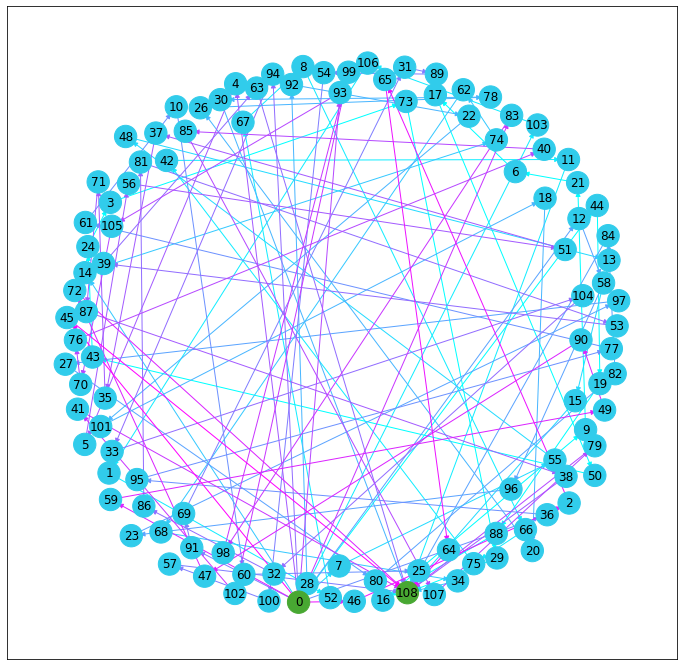

In [11]:
plt.figure(figsize=(12, 12))
values = ['#31cceb' if node!=0 and node!=n+1 else '#48a832' for node in G.nodes]
#pos = nx.kamada_kawai_layout(G, pos=nx.get_node_attributes(G,'pos'), center=(0, 0)) #weight='distance'
pos = nx.spring_layout(G, k=50, weight='distance')
#pos = nx.circular_layout(G, scale=1, center=(0,0))
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
color_idx = np.linspace(0, 1, len(routes_non_norm_gs))
for i, r in enumerate(routes_non_norm_gs):
    edges = [(a, b) for (a, b) in pairwise(r.clients)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=matplotlib.colors.to_hex(plt.cm.cool(color_idx[i])), arrows=True)
    edge_distances = nx.get_edge_attributes(G, 'Distancia (km)')
    edge_distances_to_draw = {e:edge_distances[e] for e in edges}
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_distances_to_draw)
plt.show()